In [1]:
import numpy as np
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

(533, 700, 3)
(200, 200, 3)


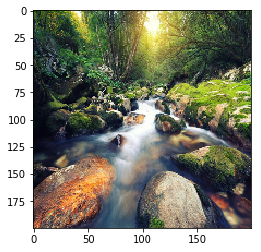

In [23]:
im = io.imread('./img_67920257.jpg')
print im.shape
im = cv2.resize(im , (200,200))
print im.shape

plt.grid('off')
plt.imshow(im)

In [24]:
#data preperation
data = im.reshape((-1,3))
print data.shape
print type(im)

(40000, 3)
<type 'numpy.ndarray'>


In [44]:
km = KMeans(n_clusters=16)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
labels = km.predict(data)

In [46]:
print labels.shape

(40000,)


In [47]:
km.cluster_centers_

array([[158.13043478, 108.80541696,  79.42337847],
       [ 32.87473385,  41.47782115,  46.55731015],
       [212.66508031, 207.0333135 , 186.47293278],
       [123.16556291, 137.47726269,  60.27328918],
       [ 78.40979474, 103.0421318 ,  53.0003601 ],
       [108.89426657, 114.48473567, 107.47393894],
       [173.98358663, 181.88449848,  63.98601824],
       [220.72523585, 142.32311321,  79.36438679],
       [ 14.96167737,  19.81962279,  29.1187801 ],
       [ 54.71106599,  66.10436548,  53.22111675],
       [242.09625213, 243.23764906, 236.3032368 ],
       [223.92341549, 198.93221831, 113.23503521],
       [155.85671256, 145.39027539, 118.82831325],
       [ 66.9067954 ,  80.43000371,  92.53694764],
       [180.91915355, 173.11557244, 153.40586001],
       [106.46616162,  84.09191919,  69.78838384]])

In [48]:
km.labels_

array([4, 3, 4, ..., 9, 9, 9], dtype=int32)

In [49]:
# labels[:1000]

In [50]:
new_pix = np.zeros_like(data)

for ix in range(new_pix.shape[0]):
    new_pix[ix, :] = km.cluster_centers_[labels[ix]].astype(np.uint8)

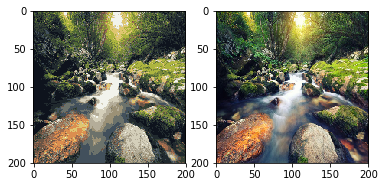

In [51]:
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(new_pix.reshape(im.shape))

plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(im)

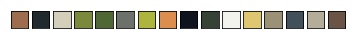

In [52]:
colors = km.cluster_centers_.astype(np.uint8)

for ix in range(colors.shape[0]):
    plt.subplot(1, colors.shape[0], ix+1)
    plt.grid("off")
    plt.xticks([])
    plt.yticks([])
    col = np.ones((100, 100, 3), dtype=np.uint8)
    col[:, :, :] = colors[ix]
    plt.imshow(col)

In [61]:
# out = np.argmin(labels ,axis =0)

In [62]:
output = np.unique(labels ,return_counts=True)

In [63]:
output

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int32),
 array([1401, 5638, 1682, 2262, 2778, 2687, 1643,  848, 4984, 4924, 1174,
        1136, 2324, 2693, 1842, 1984]))

In [64]:
out = np.argmax(output[1])

In [65]:
print out

1


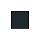

In [67]:
domcolor = km.cluster_centers_[out].astype(np.uint8)

plt.subplot(1, colors.shape[0], ix+1)
plt.grid("off")
plt.xticks([])
plt.yticks([])
col = np.ones((100, 100, 3), dtype=np.uint8)
col[:, :, :] = domcolor
plt.imshow(col)